In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
%matplotlib inline

In [6]:
os.getcwd()

'C:\\Users\\guptap6\\OneDrive - Automatic Data Processing Inc\\Documents\\jupyter_GL\\Practice\\DataMining\\Week1DataMining\\MentoringSession+Quiz'

In [7]:
os.listdir('.')

['.ipynb_checkpoints',
 'Engg College Data_Hierarchial Cluster_Student_File - Copy.ipynb',
 'Hierarchial',
 'Intro to Data Mining.pptx',
 'K-Means',
 'ReviewRatings.csv',
 'Untitled.ipynb']

In [8]:
pip show scikit-learn

Name: scikit-learn
Version: 0.24.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: c:\users\guptap6\anaconda3\lib\site-packages
Requires: threadpoolctl, joblib, scipy, numpy
Required-by: factor-analyzer
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip show seaborn

Name: seaborn
Version: 0.11.1
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: c:\users\guptap6\anaconda3\lib\site-packages
Requires: pandas, scipy, numpy, matplotlib
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [87]:
df = pd.read_csv('leaf_data_uci_updated.csv')

In [88]:
df.shape

(340, 14)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Eccentricity               340 non-null    float64
 1   Aspect Ratio               340 non-null    float64
 2   Elongation                 340 non-null    float64
 3   Solidity                   340 non-null    float64
 4   Stochastic Convexity       340 non-null    float64
 5   Isoperimetric Factor       340 non-null    float64
 6   Maximal Indentation Depth  340 non-null    float64
 7   Lobedness                  340 non-null    float64
 8   Average Intensity          340 non-null    float64
 9    Average Contrast          340 non-null    float64
 10  Smoothness                 340 non-null    float64
 11   Third moment              340 non-null    float64
 12  Uniformity                 340 non-null    float64
 13  Entropy                    340 non-null    float64

In [90]:
df.dtypes

Eccentricity                 float64
Aspect Ratio                 float64
Elongation                   float64
Solidity                     float64
Stochastic Convexity         float64
Isoperimetric Factor         float64
Maximal Indentation Depth    float64
Lobedness                    float64
Average Intensity            float64
 Average Contrast            float64
Smoothness                   float64
 Third moment                float64
Uniformity                   float64
Entropy                      float64
dtype: object

In [91]:
df.describe()

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,0.719854,1.902051,0.513760,0.919101,0.975867,0.531234,0.034647,0.284499,0.051209,0.124535,0.017491,0.005678,0.000356,1.162630
std,0.208311,0.888783,0.195583,0.075247,0.032506,0.217532,0.031502,0.365318,0.035518,0.051860,0.013189,0.004495,0.000336,0.584854
min,0.117080,1.006600,0.107610,0.761323,0.915575,0.078376,0.002837,0.001464,0.005022,0.033415,0.001115,0.000229,0.000007,0.169400
25%,0.550623,1.211300,0.349623,0.890667,0.966230,0.346818,0.009521,0.016500,0.022843,0.083362,0.006901,0.002080,0.000102,0.718900
50%,0.763450,1.570750,0.501855,0.948130,0.992980,0.579160,0.023860,0.103615,0.042087,0.119375,0.014050,0.004447,0.000239,1.077450
75%,0.895097,2.343100,0.633373,0.976897,1.000000,0.700712,0.047834,0.416432,0.073046,0.163795,0.026127,0.008307,0.000516,1.554575
max,0.998710,4.040800,0.948340,0.993880,1.000000,0.858160,0.105303,1.016331,0.148349,0.280810,0.054967,0.017648,0.001137,2.708500


In [92]:
df.duplicated().sum()

0

In [93]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [125]:
X = StandardScaler()

In [126]:
# Creating an object for the StandardScaler function
scaled_df = X.fit_transform(df)
scaled_df

array([[ 0.03406572, -0.48209894, -0.97186457, ..., -0.0993394 ,
        -0.24107626,  0.02220937],
       [ 0.10516996, -0.42406912, -0.78138363, ..., -0.66180812,
        -0.83677884, -0.79802302],
       [ 0.22771539, -0.37133521, -0.6338121 , ..., -1.06006173,
        -0.94670245, -1.23143573],
       ...,
       [-1.76156859, -0.97935258,  1.37079505, ...,  2.32734448,
         0.28950626,  0.90903502],
       [-0.57678648, -0.85563074,  1.03207692, ...,  0.11405691,
        -0.27155102, -0.01717466],
       [-1.19182128, -0.91490004,  1.74264253, ...,  1.73998658,
        -0.0808678 ,  0.68437481]])

In [127]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2,random_state=0)

In [128]:
# Fit K means on the scaled_df
k_means.fit(scaled_df)

KMeans(n_clusters=2, random_state=0)

In [129]:
# Get the labels
k_means.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [130]:
k_means.inertia_

3412.257118426089

### Forming clusters with K = 1,3,4,5,6 and comparing the WSS

In [131]:
k_means = KMeans(n_clusters = 1,random_state=0)
k_means.fit(scaled_df)
k_means.inertia_

C:\Users\guptap6\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


4759.999999999998

In [132]:
k_means = KMeans(n_clusters = 3,random_state=0)
k_means.fit(scaled_df)
k_means.inertia_

2389.230252700993

In [133]:
k_means = KMeans(n_clusters = 4,random_state=0)
k_means.fit(scaled_df)
k_means.inertia_

1895.2525135696262

In [134]:
k_means = KMeans(n_clusters = 5,random_state=0)
k_means.fit(scaled_df)
k_means.inertia_

1669.6943591959607

### Calculating WSS for other values of K - Elbow Method

In [135]:
wss = []

In [136]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=0)
    KM.fit(df)
    wss.append(KM.inertia_)

C:\Users\guptap6\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [137]:
wss

[476.7248574322788,
 269.4637381854184,
 195.11149197769853,
 140.80203031919902,
 104.64740816776701,
 85.58392865842308,
 73.45800618660763,
 64.93388227732835,
 58.2690813551555,
 52.86161260977794]

In [33]:
a=[1,2,3,4,5,6,7,8,9,10]

C:\Users\guptap6\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


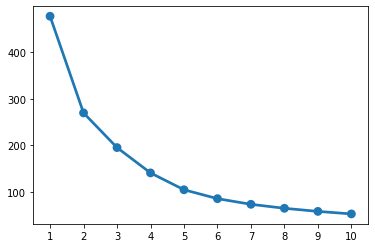

In [34]:
sns.pointplot(a,wss);

In [35]:
k_means = KMeans(n_clusters = 3,random_state=0)
k_means.fit(df)
labels = k_means.labels_

In [36]:
labels

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

### Cluster evaluation for 3 clusters: the silhouette score

In [37]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [48]:
k_means = KMeans(n_clusters = 3,random_state=0)
k_means.fit(df)
labels = k_means.labels_

In [49]:
silhouette_score(df,labels,random_state=0)

0.3242289273373851

In [50]:
k_means = KMeans(n_clusters = 2,random_state=0)
k_means.fit(df)
labels = k_means.labels_

In [51]:
# Calculating silhouette_score
silhouette_score(df,labels,random_state=0)

0.4794344444562782

In [39]:
# KMeans with K=4

In [40]:
k_means = KMeans(n_clusters = 4,random_state=0)
k_means.fit(df)
labels = k_means.labels_

In [44]:
silhouette_score(df,labels,random_state=0)

0.3482414604070682

In [46]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(df)
labels = k_means.labels_

In [47]:
silhouette_score(df,labels,random_state=0)

0.4019494822311542

In [52]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(df)
labels = k_means.labels_

In [53]:
silhouette_score(df,labels,random_state=0)

0.3928960083035855

In [56]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [58]:
wardlink = linkage(df, method = 'ward')

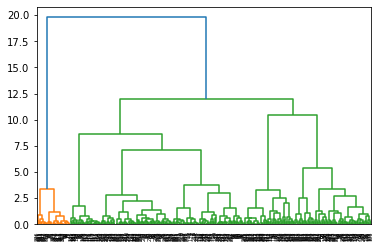

In [59]:
dend = dendrogram(wardlink)

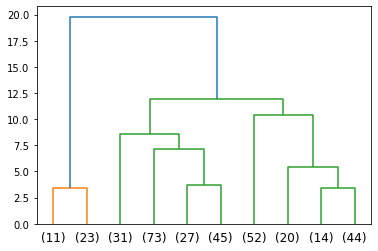

In [60]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [61]:
from scipy.cluster.hierarchy import fcluster

In [62]:
#Method 1

clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 3, 2, 2, 3,
       2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3,
       3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,

In [64]:
# Method 2

clusters = fcluster(wardlink, 12, criterion='distance')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [65]:
df['clusters'] = clusters

In [66]:
df.head()

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy,clusters
0,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560,2
1,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659,2
2,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348,2
3,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785,2
4,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000023,0.34214,2


In [116]:
print(np.random.seed(7))


None


In [120]:
np.random.seed(7)
array=np.array(np.random.rand(20)).reshape(10,2)
array

array([[0.07630829, 0.77991879],
       [0.43840923, 0.72346518],
       [0.97798951, 0.53849587],
       [0.50112046, 0.07205113],
       [0.26843898, 0.4998825 ],
       [0.67923   , 0.80373904],
       [0.38094113, 0.06593635],
       [0.2881456 , 0.90959353],
       [0.21338535, 0.45212396],
       [0.93120602, 0.02489923]])

In [121]:
X = StandardScaler()

In [122]:
# Creating an object for the StandardScaler function
df1 = X.fit_transform(array)
df1

array([[-1.39522475,  0.93201877],
       [-0.1296922 ,  0.7523863 ],
       [ 1.75612561,  0.16382359],
       [ 0.08948178, -1.32037931],
       [-0.72373342,  0.04095785],
       [ 0.71196956,  1.00781355],
       [-0.33054158, -1.33983624],
       [-0.65485934,  1.34463703],
       [-0.91614429, -0.11100733],
       [ 1.59261863, -1.47041422]])

In [123]:
k_means = KMeans(n_clusters = 2,random_state=0)
k_means.fit(df1)
labels = k_means.labels_

In [124]:
silhouette_score(df1,labels,random_state=0)

0.4069015400992441